In [1]:
import pandas as pd
import cv2
import pytesseract

from PIL import Image

In [2]:
df10 = pd.read_csv('table_10.csv', index_col=0)

In [3]:
lect = 1

paths00 = df10.loc[df10['lect'] == lect, 'path00']
paths01 = df10.loc[df10['lect'] == lect, 'path01']

images00 = [cv2.imread(path) for path in paths00]
images01 = [cv2.imread(path) for path in paths01]

In [4]:
# Level 1 - Page
# Level 2 - Block
# Level 3 - Paragraph
# Level 4 - Line
# Level 5 - Word

data00 = [pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang='deu') for image in images00]
#data01 = [pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang='deu') for image in images01]

In [5]:
pd.DataFrame(data00[1])

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        1         1          0        0         0         0     0     0   
1        2         1          1        0         0         0   510   309   
2        3         1          1        1         0         0   510   309   
3        4         1          1        1         1         0   510   309   
4        5         1          1        1         1         1   510   312   
..     ...       ...        ...      ...       ...       ...   ...   ...   
441      5         1          6        1         1        10  2006  4800   
442      5         1          6        1         1        11  2321  4826   
443      5         1          6        1         1        12  2491  4817   
444      5         1          6        1         1        13  2559  4805   
445      5         1          6        1         1        14  2880  4806   

     width  height  conf    text  
0     3390    5414    -1          
1     1556      72    -1          
2     1556      72    -1          
3     1556      72    -1          
4       43      63    95       2  
..     ...     ...   ...     ...  
441    269      68    91  Werthe  
442    123      44    93     von  
443     25      51    31       f  
444    230      64    95  haben.  
445    203      66    95   Dabei  

[446 rows x 12 columns]

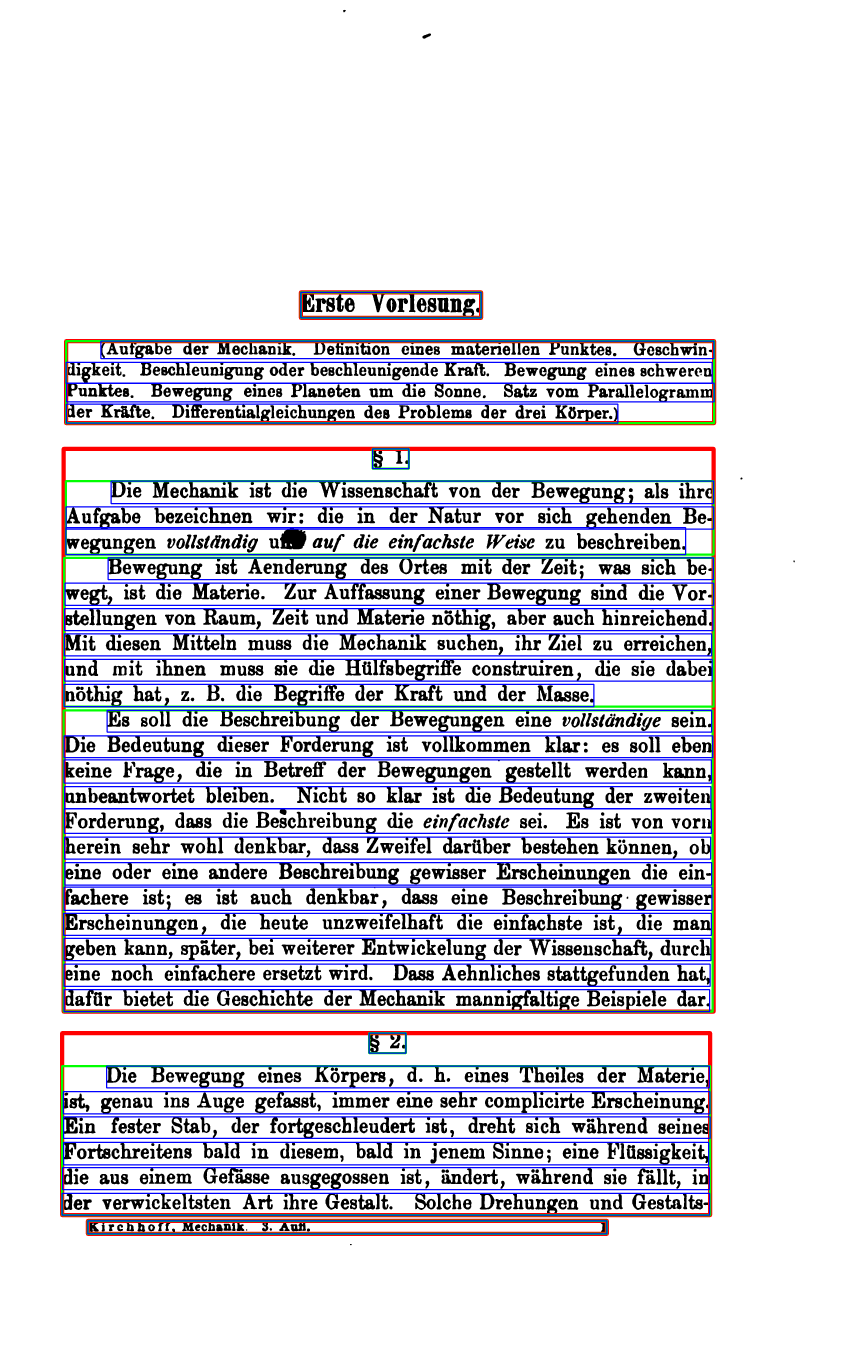

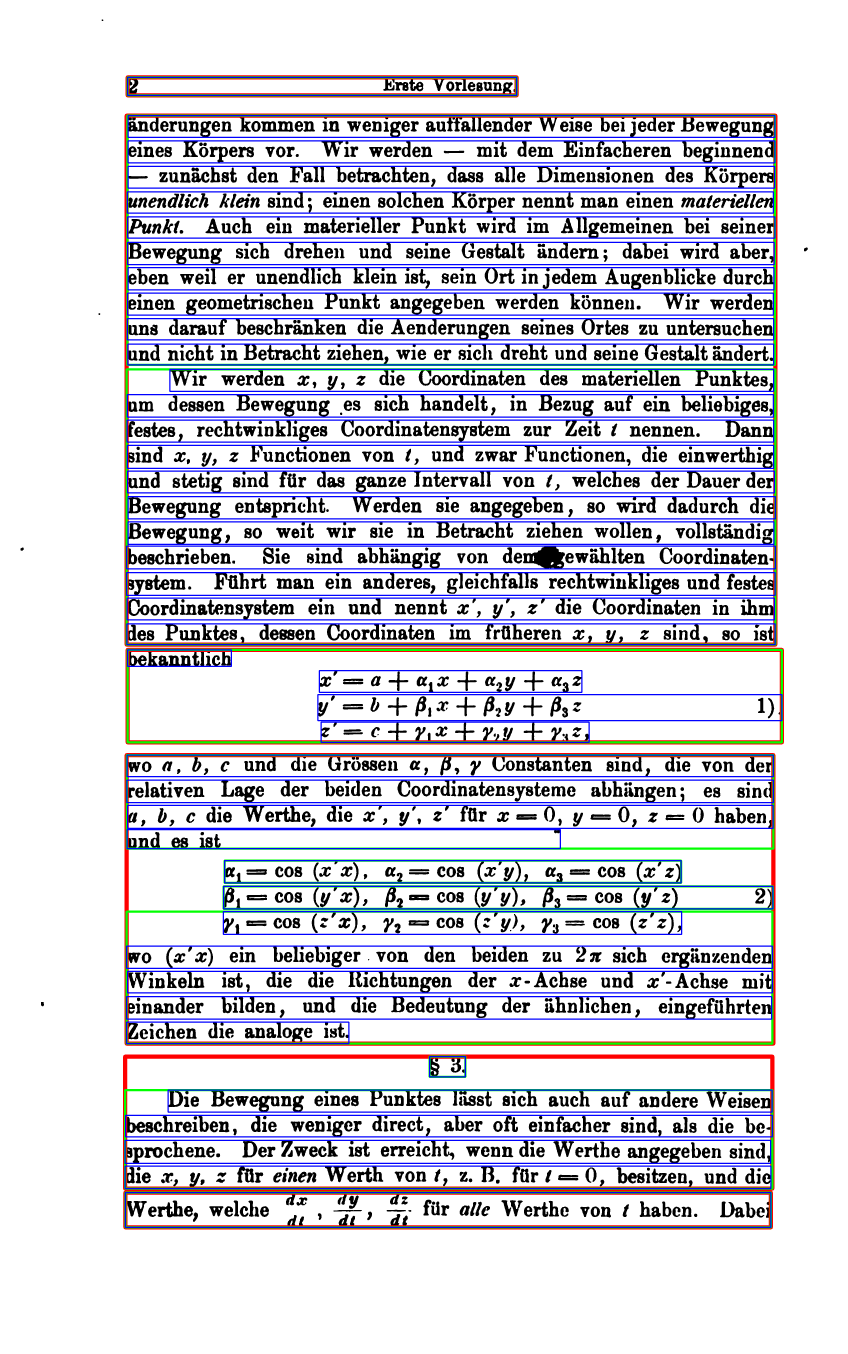

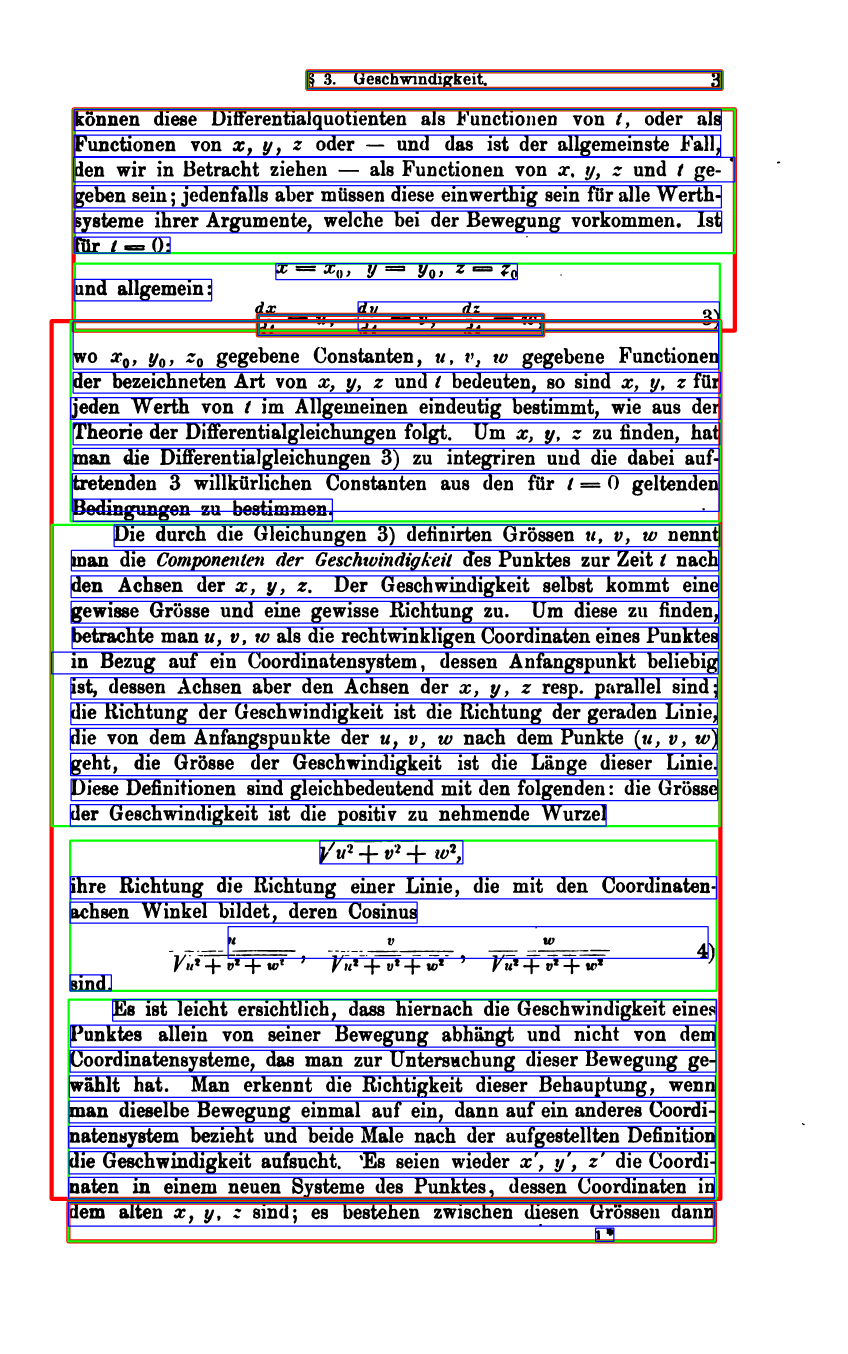

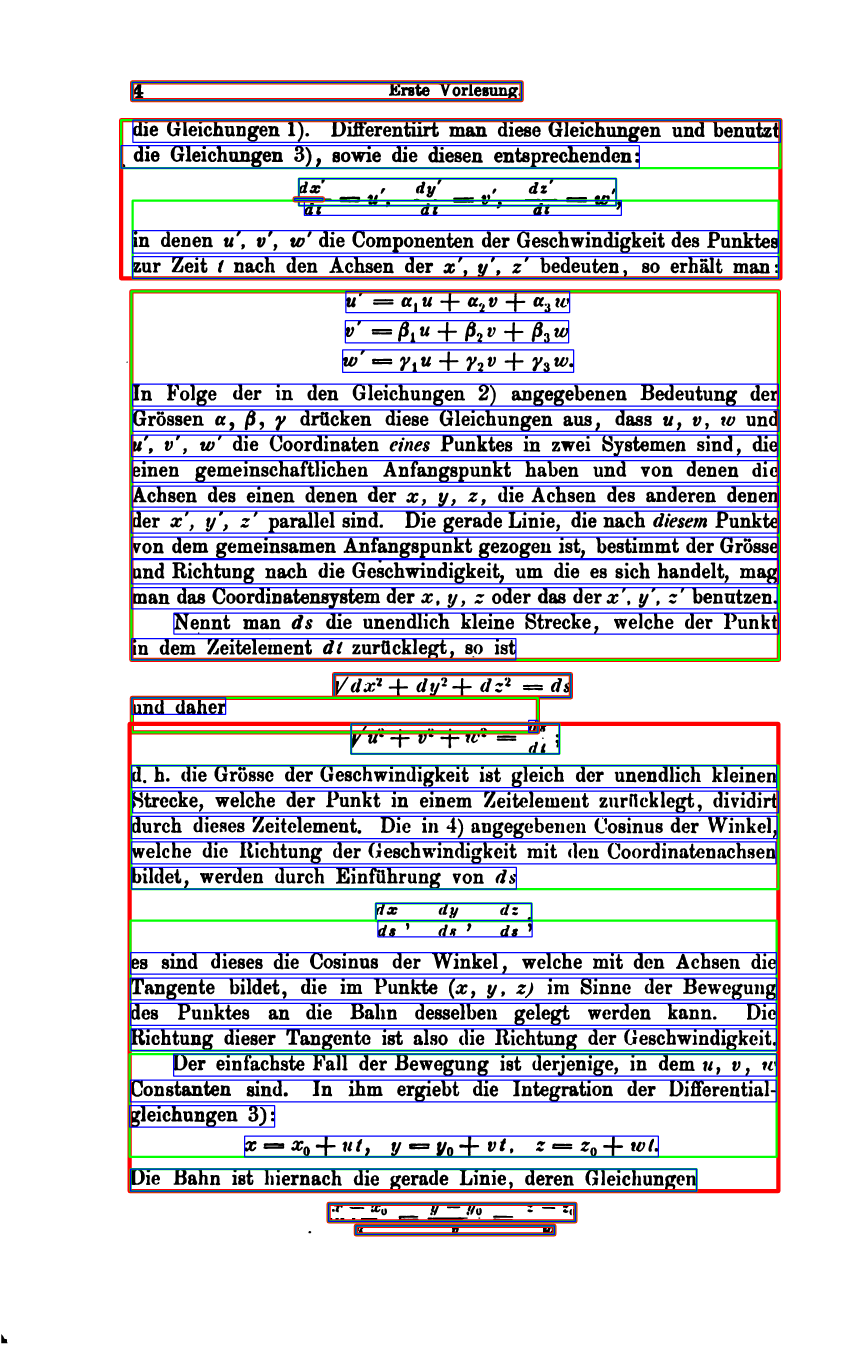

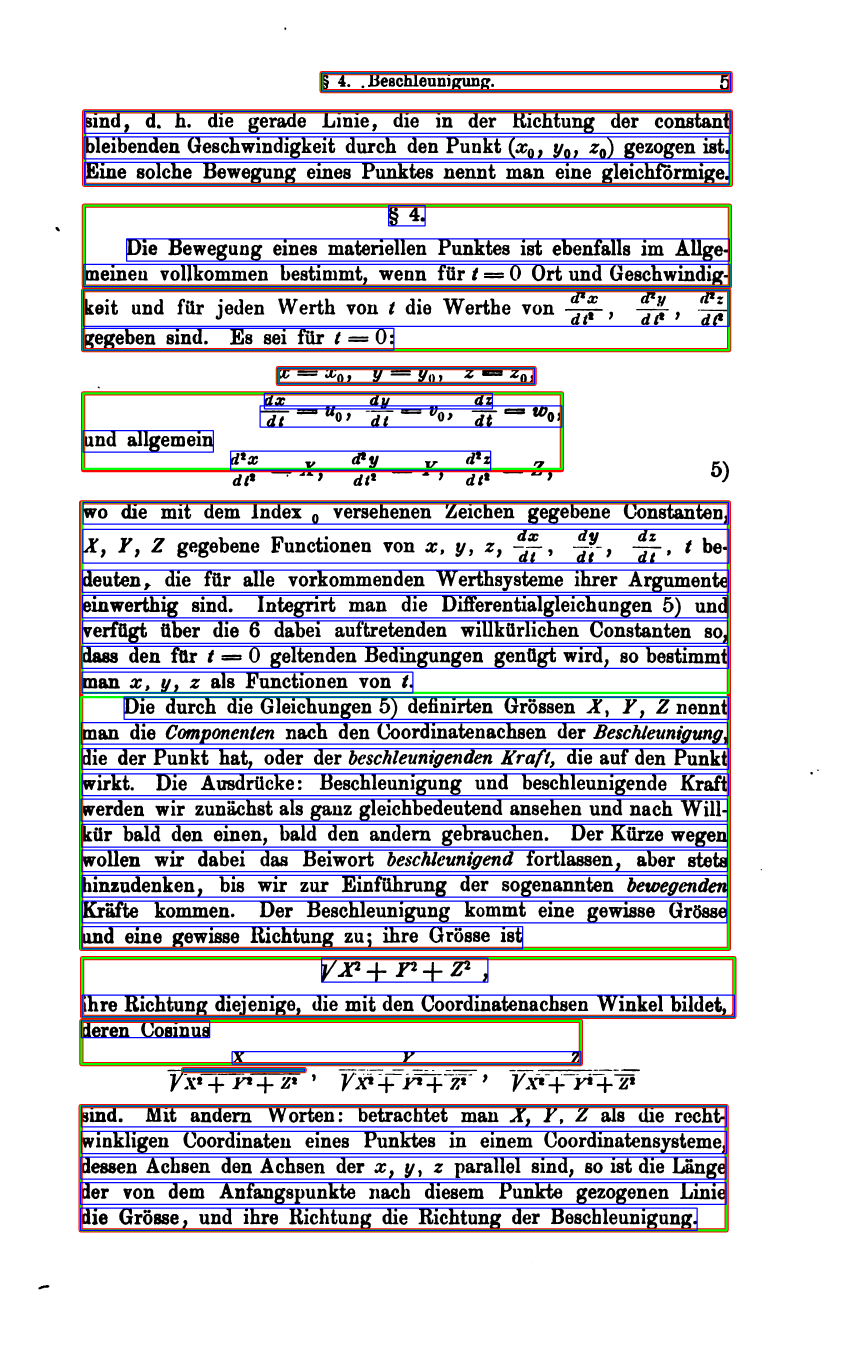

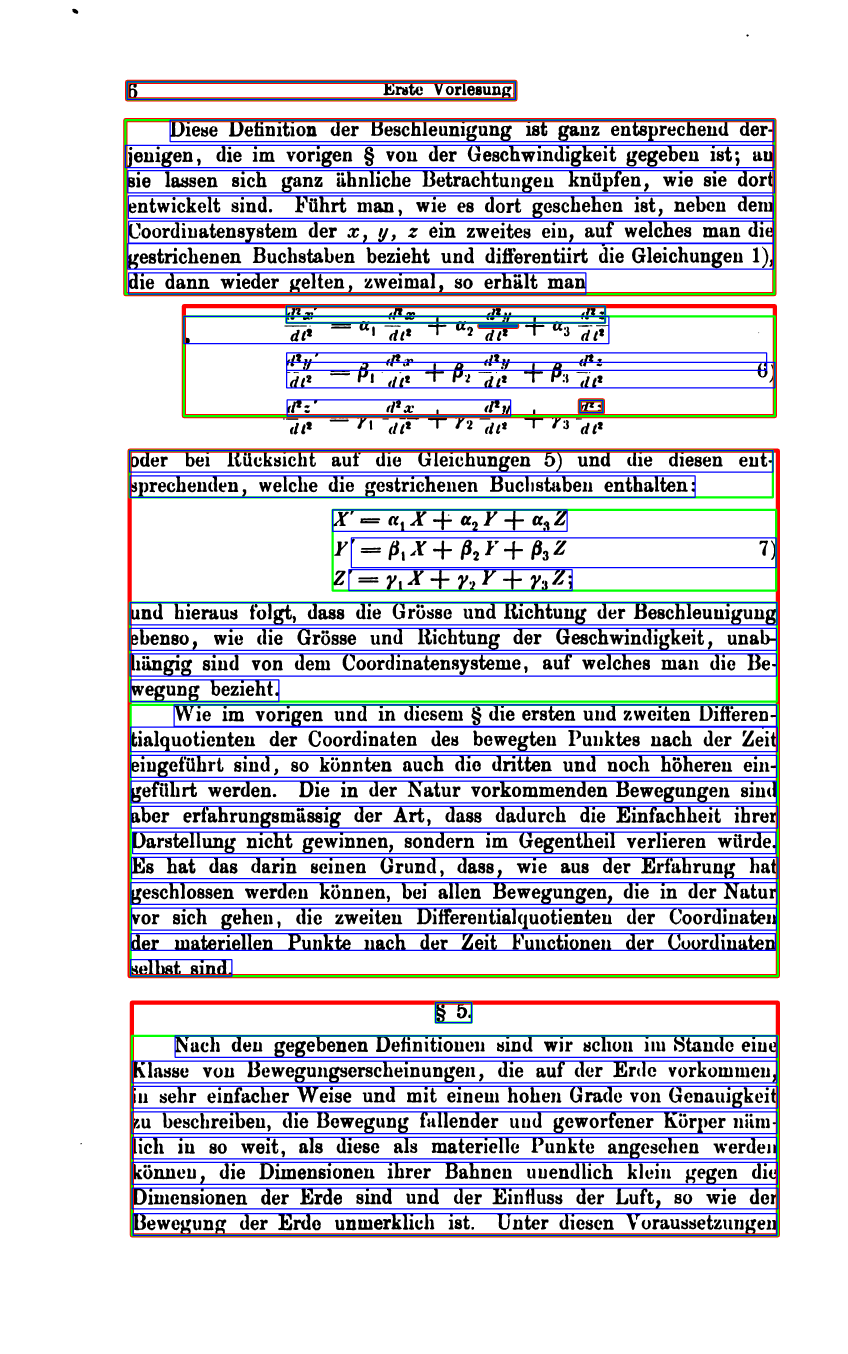

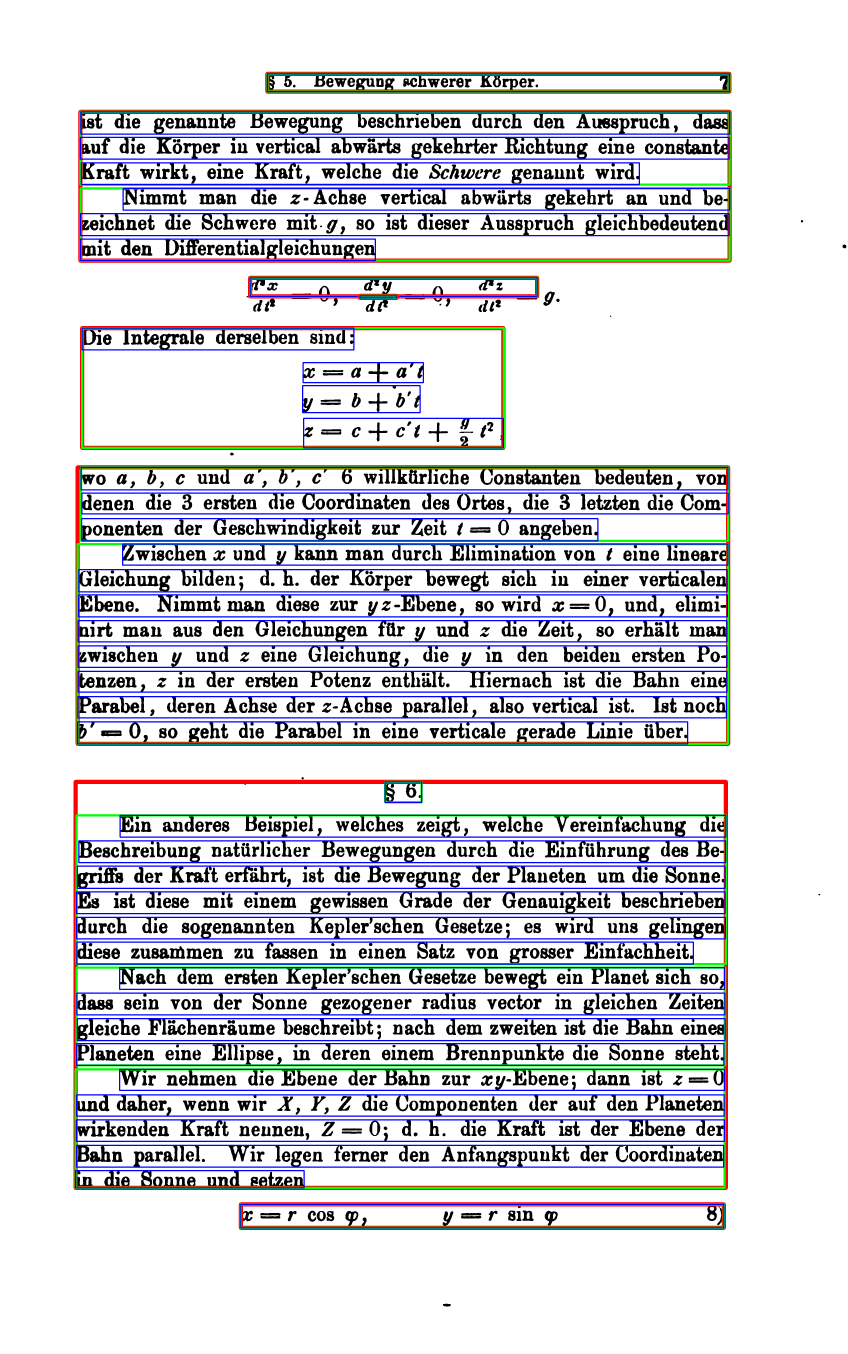

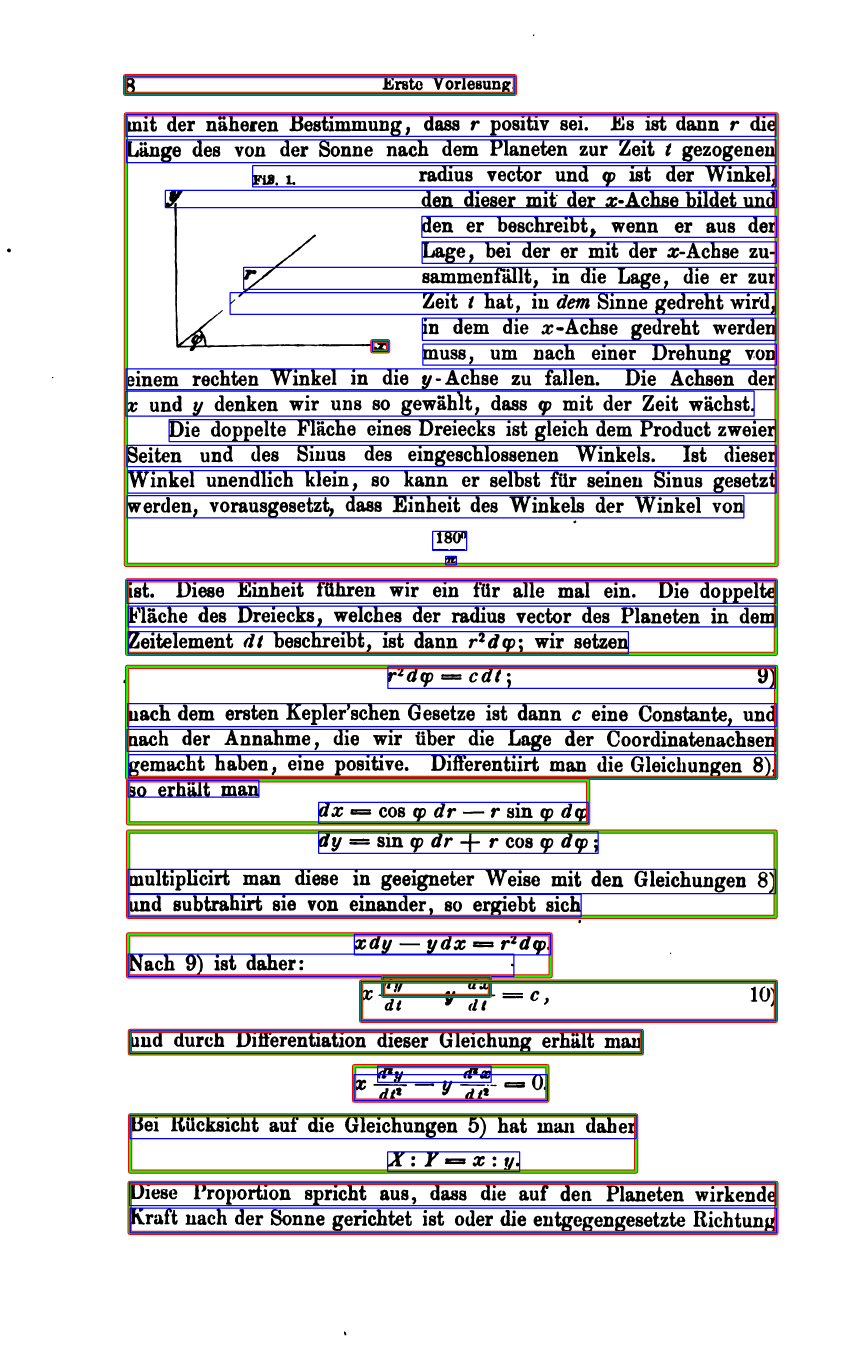

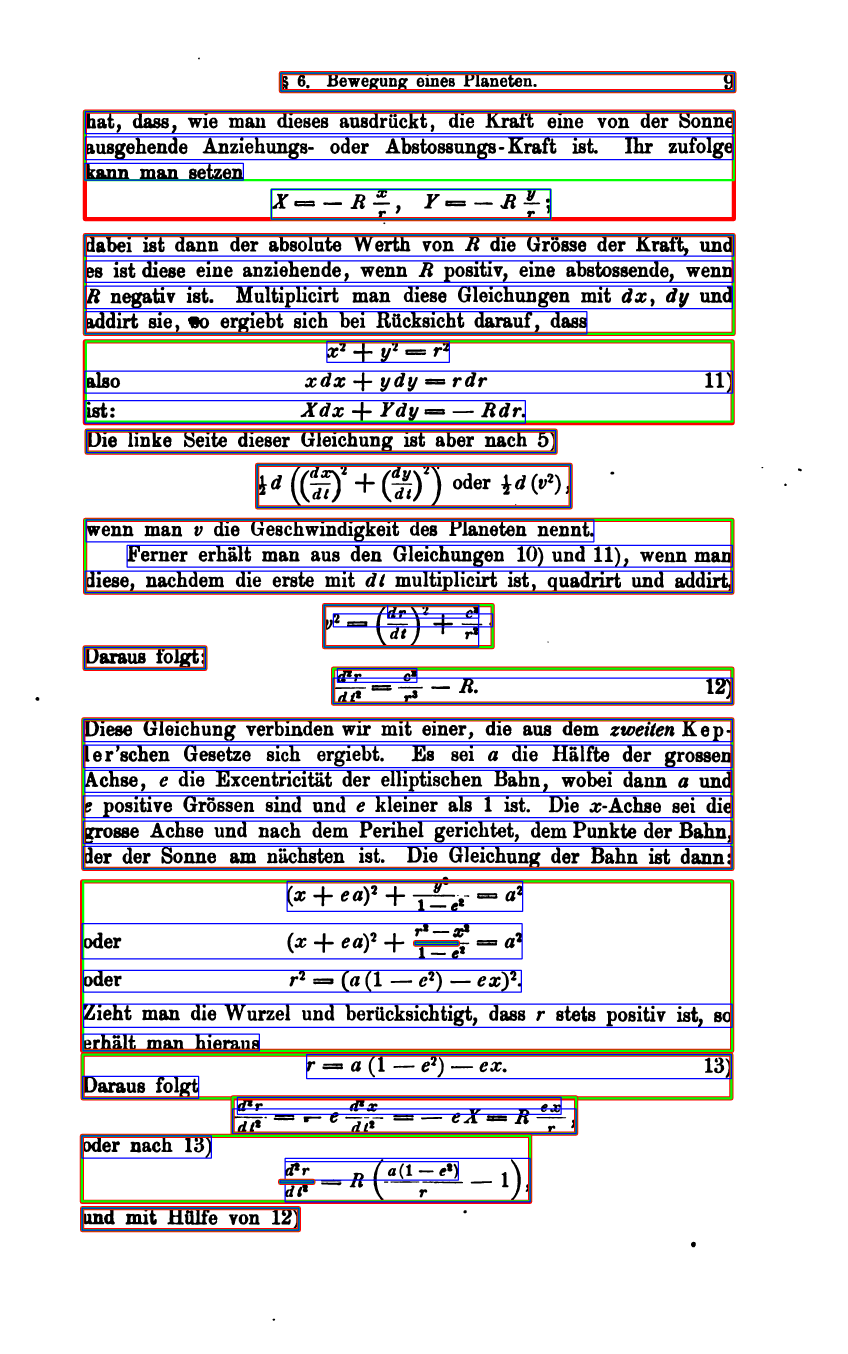

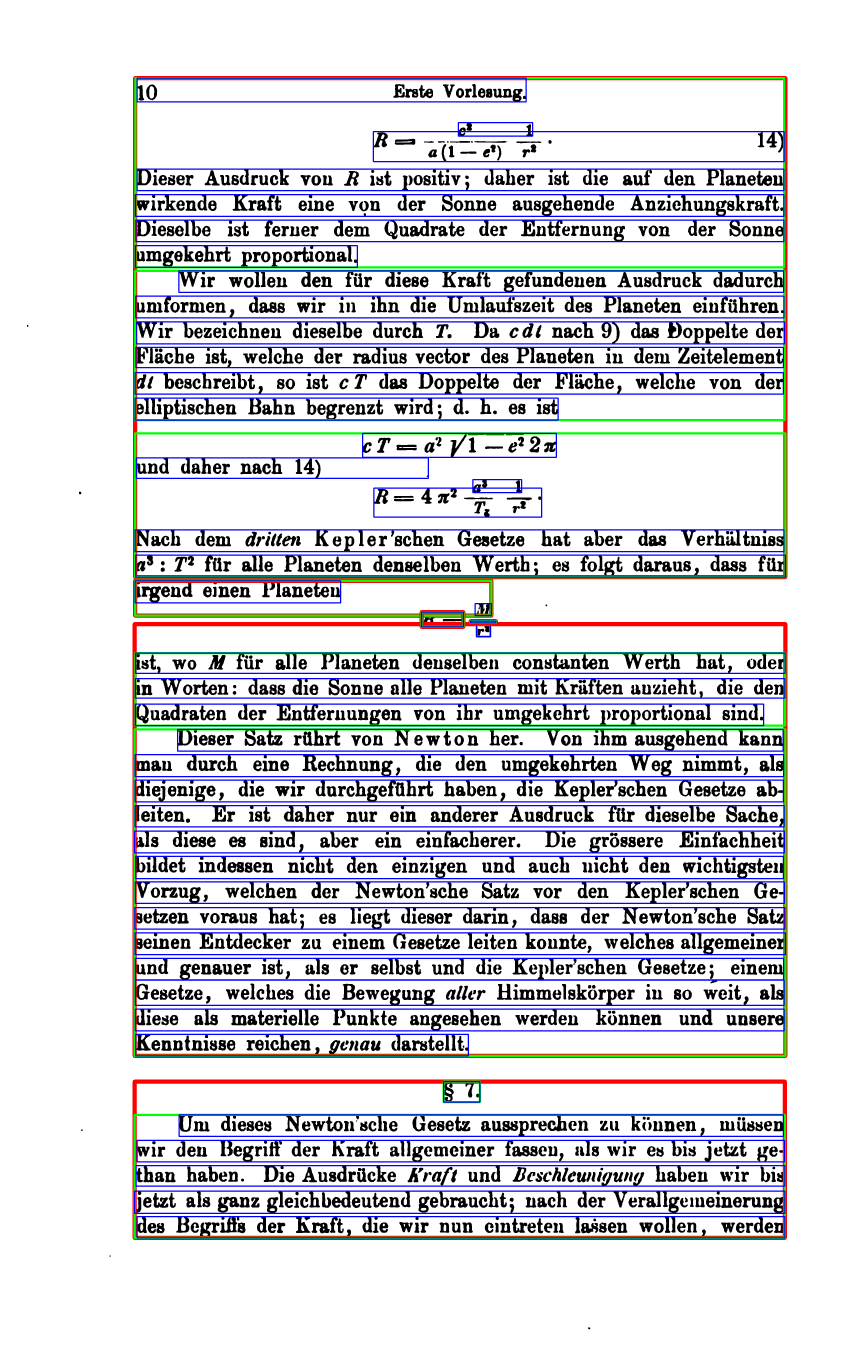

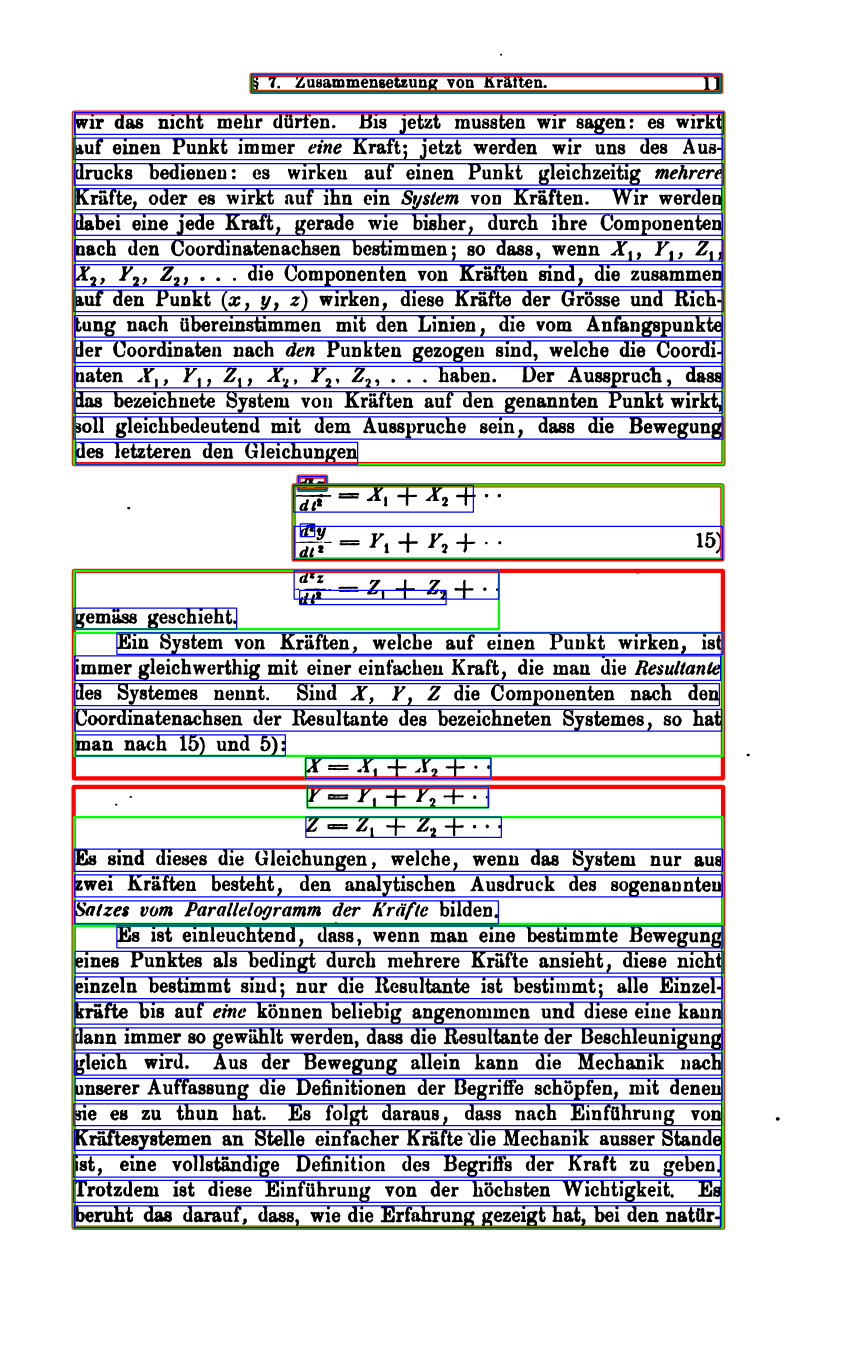

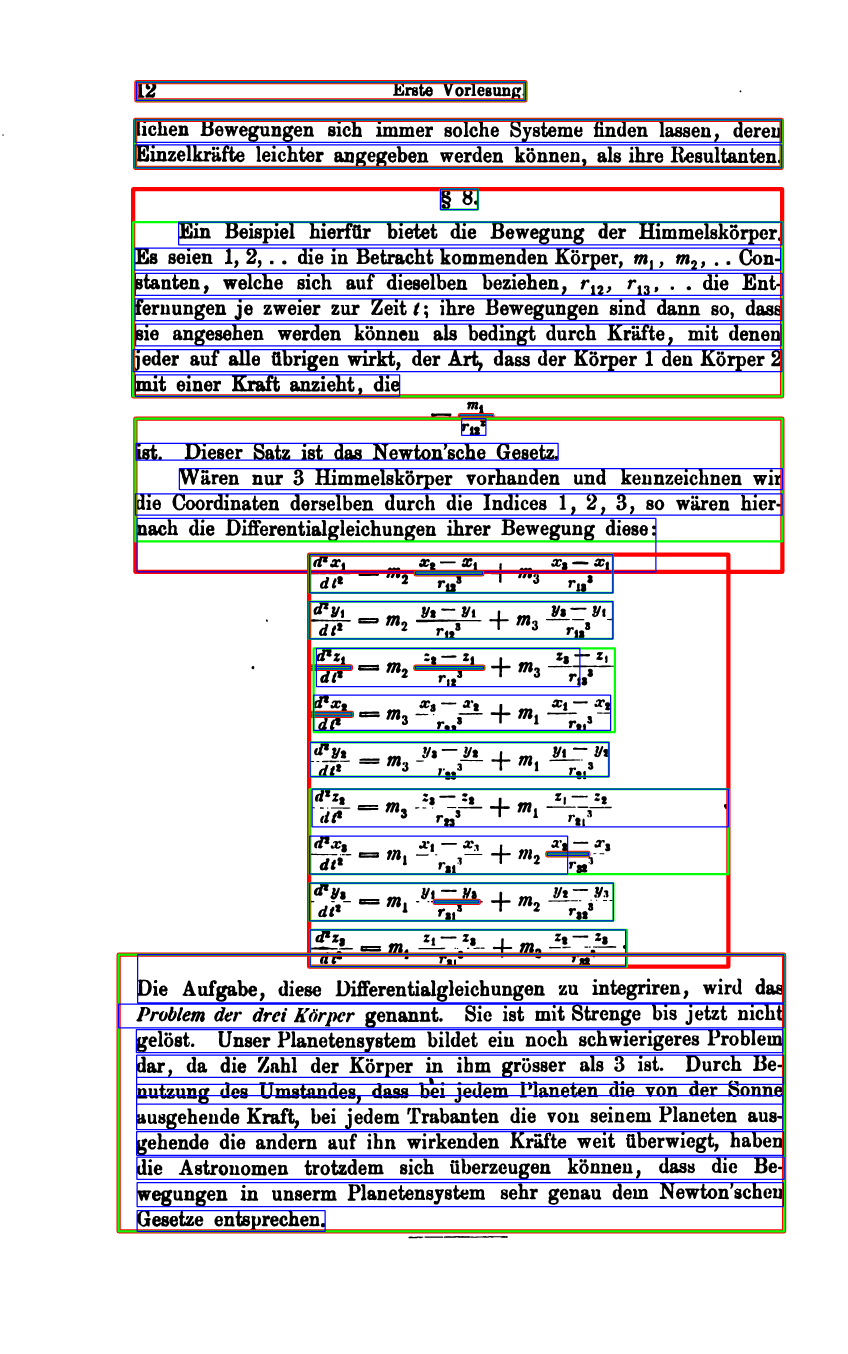

In [6]:
for image, data in zip(images00, data00):
    for level, x, y, w, h in zip(data['level'], data['left'], data['top'], data['width'], data['height']):
        
        if level == 2:
             cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 16)
        if level == 3:
             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 8)
        if level == 4:
             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 4)
    
    display(Image.fromarray(image).reduce(4))